In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from selenium import webdriver
import time

In [3]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://info.nec.go.kr/')

In [4]:
driver.switch_to_default_content()
driver.switch_to_frame('main')

In [5]:
#'역대선거'항목 클릭
driver.find_element_by_xpath("""//*[@id="header"]/ul[1]/li[2]/a""").click()

In [6]:
# '투개표'항목 클릭
driver.find_element_by_xpath("""//*[@id="presubmu"]/li[3]/a""").click()

In [7]:
# '개표현황(읍면동별)'항목 클릭
driver.find_element_by_xpath("""//*[@id="header"]/div[4]/ul/li[5]/a""").click()

In [8]:
# '대통령선거'항목 클릭
driver.find_element_by_xpath("""//*[@id="electionType1"]""").click()

In [9]:
election_list_raw = driver.find_element_by_xpath("""//*[@id="electionName"]""")
election_list = election_list_raw.find_elements_by_tag_name("option")

election_name_values = [option.text for option in election_list]
election_name_values = election_name_values[1:]
election_name_values

['제19대', '제18대', '제17대']

In [10]:
element = driver.find_element_by_id('electionName')
element.send_keys(election_name_values[0])

In [11]:
election_code_raw = driver.find_element_by_xpath("""//*[@id="electionCode"]""")
election_code = election_code_raw.find_elements_by_tag_name("option")

election_code_values = [option.text for option in election_code]
election_code_values = election_code_values[1:]
election_code_values

['대통령선거']

In [12]:
element = driver.find_element_by_id('electionCode')
element.send_keys(election_code_values[0])

In [13]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option")

sido_name_values = [option.text for option in sido_list]
sido_name_values = sido_name_values[1:]
sido_name_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [14]:
element = driver.find_element_by_id('cityCode')
element.send_keys(sido_name_values[0])

In [15]:
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name("option")

sigun_name_values = [option.text for option in sigun_list]
sigun_name_values = sigun_name_values[1:]
sigun_name_values

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [16]:
element = driver.find_element_by_id('townCode')
element.send_keys(sigun_name_values[0])

In [17]:
driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()

In [18]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [19]:
tmp = soup.find_all('td','alignR')
tmp[:7]

[<td class="alignR">133,769</td>,
 <td class="alignR">102,566</td>,
 <td class="alignR">42,512</td>,
 <td class="alignR">22,325</td>,
 <td class="alignR">22,313</td>,
 <td class="alignR">7,412</td>,
 <td class="alignR">7,113</td>]

In [20]:
from tqdm import tqdm_notebook

In [21]:
sido_name_list = []
sigun_name_list = []
        
for sido_name_value in tqdm_notebook(sido_name_values):
    element = driver.find_element_by_id('cityCode')
    element.send_keys(sido_name_value)
            
    time.sleep(1)
            
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
    
    sigun_name_values = [option.text for option in sigun_list]
    sigun_name_values = sigun_name_values[1:]
            
    for sigun_name_value in sigun_name_values:
        sido_name_list.append(sido_name_value)
        sigun_name_list.append(sigun_name_value)


In [22]:
election_result = pd.DataFrame({'광역시도':sido_name_list,"시군구":sigun_name_list})

election_result.head()

,광역시도,시군구
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,용산구
3,서울특별시,성동구
4,서울특별시,광진구


In [23]:
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    tmp = soup.find_all('td','alignR')
    tmp_values = [float(tmp_val.get_text().replace(',','')) for tmp_val in tmp[0:7]]
    
    all[n] = tmp_values[0]
    pop[n] = tmp_values[1]
    moon[n] = tmp_values[2]
    hong[n] = tmp_values[3]
    ahn[n] = tmp_values[4]
    yoo[n] = tmp_values[5]
    sim[n] = tmp_values[6]

In [24]:
import numpy as np

def fail_procedure(n):
    all[n] = np.nan
    pop[n] = np.nan
    moon[n] = np.nan
    hong[n] = np.nan
    ahn[n] = np.nan
    yoo[n] = np.nan
    sim[n] = np.nan

In [25]:
all = [np.nan]*len(election_result)
pop = [np.nan]*len(election_result)
moon = [np.nan]*len(election_result)
hong = [np.nan]*len(election_result)
ahn = [np.nan]*len(election_result)
yoo = [np.nan]*len(election_result)
sim = [np.nan]*len(election_result)

len(all), len(pop),len(moon)

(250, 250, 250)

In [30]:
for n in tqdm_notebook(election_result.index):
    try:
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(1)
        
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군구'][n])
        
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(1)
        
        get_vote_info(n)
        
    except:
        print('EEERRRRRROOORRR')
        fail_procedure(n)

EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRR

In [29]:
# element = driver.find_element_by_id('cityCode')
# element.send_keys(election_result['광역시도'][1])
        
# time.sleep(0.5)
        
# element = driver.find_element_by_id('townCode')
# element.send_keys(election_result['시군구'][1])
        
# driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
# time.sleep(0.5)
        
# get_vote_info(1)

In [42]:
election_result['all'] = all
election_result['pop'] = pop
election_result['moon'] = moon
election_result['hong'] = hong
election_result['ahn'] = ahn
election_result['yoo'] = yoo
election_result['sim'] = sim


election_result.head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412.0,7113.0
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874.0,4993.0
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825.0,9773.0
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859.0,12936.0
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114.0,16540.0


In [43]:
re_try_index = election_result[election_result['pop'].isnull()].index

for n in tqdm_notebook(re_try_index):
    try:
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(1)
        
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군구'][n])
        
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(1)
        
        get_vote_info(n)
        
    except:
        print('EEERRRRRROOORRR')
        fail_procedure(n)

In [44]:
election_result.to_csv('../data/05.electionresult.csv',encoding='utf-8',sep=',')

In [45]:
driver.close()

In [46]:
election_result.head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412.0,7113.0
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874.0,4993.0
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825.0,9773.0
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859.0,12936.0
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114.0,16540.0


In [105]:
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산'] else '' for name in sido_candi]

In [106]:
sido_candi

['서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [107]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [108]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군구'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시',each)[0]+' '+cut_char_sigu(re.split('시',each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

In [109]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0] == ' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2] == '세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

In [110]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412.0,7113.0,서울 종로,0.414484,0.217665,0.217548,0.072266,0.069350,0.766740
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874.0,4993.0,서울 중구,0.411119,0.216060,0.233815,0.070898,0.060264,0.754325
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825.0,9773.0,서울 용산,0.392023,0.237788,0.216723,0.079814,0.065964,0.748411
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859.0,12936.0,서울 성동,0.426657,0.199660,0.224801,0.078056,0.063669,0.784432
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114.0,16540.0,서울 광진,0.439578,0.193176,0.220072,0.071299,0.068908,0.786540
5,서울특별시,동대문구,304972.0,236092.0,98958.0,51631.0,53359.0,15129.0,15107.0,서울 동대문,0.419150,0.218690,0.226009,0.064081,0.063988,0.774143
6,서울특별시,중랑구,351986.0,265706.0,111450.0,56545.0,62778.0,15996.0,16817.0,서울 중랑,0.419449,0.212810,0.236269,0.060202,0.063292,0.754877
7,서울특별시,성북구,378024.0,295866.0,129263.0,57584.0,66518.0,19830.0,20519.0,서울 성북,0.436897,0.194629,0.224825,0.067024,0.069352,0.782665
8,서울특별시,강북구,281434.0,210614.0,89645.0,42268.0,51669.0,11871.0,13482.0,서울 강북,0.425636,0.200689,0.245326,0.056364,0.064013,0.748360
9,서울특별시,도봉구,293679.0,229233.0,94898.0,47461.0,55600.0,14500.0,14923.0,서울 도봉,0.413981,0.207043,0.242548,0.063254,0.065100,0.780556


In [111]:
election_result[['rate_moon','rate_hong','rate_ahn','rate_yoo','rate_sim']] = election_result[['moon','hong','ahn','yoo','sim']].div(election_result['pop'], axis=0)

election_result.head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412.0,7113.0,서울 종로,0.414484,0.217665,0.217548,0.072266,0.069350,0.766740
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874.0,4993.0,서울 중구,0.411119,0.216060,0.233815,0.070898,0.060264,0.754325
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825.0,9773.0,서울 용산,0.392023,0.237788,0.216723,0.079814,0.065964,0.748411
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859.0,12936.0,서울 성동,0.426657,0.199660,0.224801,0.078056,0.063669,0.784432
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114.0,16540.0,서울 광진,0.439578,0.193176,0.220072,0.071299,0.068908,0.786540


In [112]:
election_result[['poll_rate']] = election_result[['pop']].div(election_result['all'], axis=0)

In [113]:
election_result.head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412.0,7113.0,서울 종로,0.414484,0.217665,0.217548,0.072266,0.069350,0.766740
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874.0,4993.0,서울 중구,0.411119,0.216060,0.233815,0.070898,0.060264,0.754325
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825.0,9773.0,서울 용산,0.392023,0.237788,0.216723,0.079814,0.065964,0.748411
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859.0,12936.0,서울 성동,0.426657,0.199660,0.224801,0.078056,0.063669,0.784432
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114.0,16540.0,서울 광진,0.439578,0.193176,0.220072,0.071299,0.068908,0.786540


In [114]:
election_result.sort_values(['poll_rate'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
108,경기도,용인시수지구,268809.0,225513.0,95325.0,50229.0,47125.0,18555.0,13042.0,용인 수지,0.422703,0.222732,0.208968,0.082279,0.057833,0.838934
81,경기도,성남시분당구,403060.0,338076.0,139853.0,71332.0,74040.0,30351.0,20415.0,성남 분당,0.413673,0.210994,0.219004,0.089776,0.060386,0.838773
227,경상남도,창원시성산구,183547.0,153327.0,63717.0,42052.0,22923.0,12512.0,10826.0,창원 성산,0.415563,0.274264,0.149504,0.081603,0.070607,0.835356
78,경기도,수원시영통구,264002.0,220307.0,105181.0,33354.0,46872.0,18468.0,15086.0,수원 영통,0.477429,0.151398,0.212758,0.083828,0.068477,0.834490
84,경기도,안양시동안구,277376.0,230674.0,101278.0,43072.0,51966.0,17577.0,15294.0,안양 동안,0.439053,0.186722,0.225279,0.076198,0.066301,0.831629


In [115]:
election_result.sort_values(['rate_moon'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
182,전라남도,순천시,223756.0,181451.0,122595.0,4525.0,40429.0,4326.0,7475.0,순천,0.675637,0.024938,0.222809,0.023841,0.041196,0.810932
166,전라북도,전주시덕진구,230552.0,187921.0,125375.0,5183.0,40188.0,5286.0,10773.0,전주 덕진,0.667169,0.027581,0.213856,0.028129,0.057327,0.815092
165,전라북도,전주시완산구,289452.0,236383.0,157637.0,7003.0,50506.0,6977.0,12678.0,전주 완산,0.666871,0.029626,0.213662,0.029516,0.053633,0.816657
175,전라북도,장수군,20123.0,16079.0,10714.0,717.0,3353.0,342.0,688.0,장수,0.666335,0.044592,0.208533,0.021270,0.042789,0.799036
184,전라남도,광양시,120767.0,96384.0,63544.0,4100.0,20080.0,3145.0,4553.0,광양,0.659280,0.042538,0.208333,0.032630,0.047238,0.798099


In [116]:
election_result.sort_values(['rate_hong'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
219,경상북도,군위군,22560.0,17627.0,2251.0,11651.0,1939.0,1054.0,470.0,군위,0.127702,0.660975,0.110002,0.059795,0.026664,0.781339
220,경상북도,의성군,49768.0,37855.0,5365.0,23790.0,4767.0,2184.0,1023.0,의성,0.141725,0.628451,0.125928,0.057694,0.027024,0.760629
223,경상북도,영덕군,34714.0,26125.0,3786.0,16314.0,3231.0,1513.0,807.0,영덕,0.144919,0.624459,0.123675,0.057914,0.030890,0.752578
247,경상남도,합천군,42887.0,33021.0,7143.0,19699.0,3077.0,1317.0,1065.0,합천,0.216317,0.596560,0.093183,0.039884,0.032252,0.769954
216,경상북도,고령군,29964.0,22396.0,3754.0,13248.0,2600.0,1523.0,839.0,고령,0.167619,0.591534,0.116092,0.068003,0.037462,0.747430


In [117]:
election_result.sort_values(['rate_ahn'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
196,전라남도,진도군,27614.0,21189.0,10392.0,511.0,8855.0,323.0,686.0,진도,0.490443,0.024116,0.417906,0.015244,0.032375,0.767328
201,전라남도,신안군,38305.0,28950.0,14370.0,713.0,12000.0,459.0,890.0,신안,0.496373,0.024629,0.414508,0.015855,0.030743,0.755776
193,전라남도,강진군,32299.0,25175.0,12476.0,753.0,10152.0,489.0,890.0,강진,0.495571,0.029911,0.403257,0.019424,0.035353,0.779436
195,전라남도,해남군,63440.0,48351.0,25901.0,1158.0,18157.0,778.0,1581.0,해남,0.535687,0.023950,0.375525,0.016091,0.032698,0.762153
197,전라남도,영암군,47164.0,36402.0,18999.0,825.0,13610.0,674.0,1773.0,영암,0.521922,0.022664,0.373881,0.018515,0.048706,0.771817


In [118]:
election_result.sort_values(['rate_yoo'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
42,대구광역시,동구,294274.0,226510.0,47350.0,100166.0,31351.0,35819.0,9509.0,대구 동구,0.209042,0.442214,0.138409,0.158134,0.041980,0.769725
46,대구광역시,수성구,356388.0,285528.0,64922.0,123074.0,43698.0,38613.0,12778.0,대구 수성,0.227375,0.431040,0.153043,0.135234,0.044752,0.801172
45,대구광역시,북구,355739.0,276725.0,62526.0,121368.0,42369.0,33915.0,13833.0,대구 북구,0.225950,0.438587,0.153109,0.122558,0.049988,0.777888
47,대구광역시,달서구,479081.0,374766.0,82726.0,165781.0,57956.0,45593.0,18805.0,대구 달서,0.220740,0.442359,0.154646,0.121657,0.050178,0.782260
48,대구광역시,달성군,179372.0,137920.0,31753.0,60032.0,21427.0,15964.0,7287.0,대구 달성,0.230228,0.435267,0.155358,0.115748,0.052835,0.768905


In [119]:
election_result.sort_values(['rate_sim'], ascending = False).head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
71,울산광역시,동구,138379.0,109054.0,44931.0,23701.0,19290.0,8337.0,11590.0,울산 동구,0.412007,0.217333,0.176885,0.076448,0.106278,0.788082
72,울산광역시,북구,151453.0,122933.0,52058.0,26596.0,20115.0,10004.0,12916.0,울산 북구,0.423466,0.216345,0.163626,0.081378,0.105065,0.811691
92,경기도,고양시덕양구,366265.0,287087.0,120063.0,55157.0,61581.0,18038.0,30094.0,고양 덕양,0.418211,0.192126,0.214503,0.062831,0.104825,0.783823
248,제주특별자치도,제주시,375292.0,273163.0,125717.0,48027.0,55971.0,16885.0,23592.0,제주,0.460227,0.175818,0.204900,0.061813,0.086366,0.727868
93,경기도,고양시일산동구,239470.0,188297.0,81622.0,34980.0,41166.0,13989.0,15308.0,고양 일산동,0.433475,0.185770,0.218623,0.074292,0.081297,0.786307


In [120]:
draw_korea = pd.read_csv('../data/05. draw_korea.csv',encoding='utf-8')

In [139]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [140]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [123]:
election_result[election_result['ID']=='고성']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
125,강원도,고성군,25637.0,18692.0,5664.0,6511.0,3964.0,1239.0,979.0,고성,0.303017,0.348331,0.212069,0.066285,0.052375,0.729102
233,경상남도,고성군,47369.0,34603.0,9848.0,16797.0,4104.0,1828.0,1459.0,고성,0.284600,0.485420,0.118602,0.052828,0.042164,0.730499


In [124]:
election_result.loc[125,'ID'] = '고성(강원)'
election_result.loc[233,'ID'] = '고성(경남)'

election_result[election_result['시군구']=='고성군']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
125,강원도,고성군,25637.0,18692.0,5664.0,6511.0,3964.0,1239.0,979.0,고성(강원),0.303017,0.348331,0.212069,0.066285,0.052375,0.729102
233,경상남도,고성군,47369.0,34603.0,9848.0,16797.0,4104.0,1828.0,1459.0,고성(경남),0.284600,0.485420,0.118602,0.052828,0.042164,0.730499


In [125]:
election_result[election_result['광역시도']=='경상남도']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
226,경상남도,창원시의창구,207375.0,164047.0,60757.0,56887.0,22830.0,12134.0,9772.0,창원 의창,0.370363,0.346773,0.139167,0.073967,0.059568,0.791064
227,경상남도,창원시성산구,183547.0,153327.0,63717.0,42052.0,22923.0,12512.0,10826.0,창원 성산,0.415563,0.274264,0.149504,0.081603,0.070607,0.835356
228,경상남도,창원시마산합포구,153651.0,119281.0,35592.0,54488.0,14686.0,7491.0,5887.0,창원 마산합포,0.298388,0.456804,0.123121,0.062801,0.049354,0.776311
229,경상남도,창원시마산회원구,172306.0,136757.0,45014.0,56340.0,17744.0,9228.0,7132.0,창원 마산회원,0.329153,0.411972,0.129748,0.067477,0.052151,0.793687
230,경상남도,창원시진해구,146938.0,114779.0,41249.0,40049.0,17435.0,8732.0,6186.0,창원 진해,0.359378,0.348923,0.151901,0.076077,0.053895,0.781139
231,경상남도,진주시,281105.0,222813.0,73929.0,93751.0,26687.0,14735.0,11243.0,진주,0.331798,0.420761,0.119773,0.066132,0.050459,0.792633
232,경상남도,통영시,111279.0,82855.0,25477.0,36128.0,10738.0,5332.0,4075.0,통영,0.307489,0.436039,0.129600,0.064353,0.049182,0.744570
233,경상남도,고성군,47369.0,34603.0,9848.0,16797.0,4104.0,1828.0,1459.0,고성(경남),0.284600,0.485420,0.118602,0.052828,0.042164,0.730499
234,경상남도,사천시,94377.0,71555.0,22370.0,32475.0,8350.0,4135.0,3267.0,사천,0.312627,0.453847,0.116693,0.057788,0.045657,0.758183
235,경상남도,김해시,414018.0,318253.0,147972.0,82880.0,45126.0,21936.0,17441.0,김해,0.464951,0.260422,0.141793,0.068926,0.054802,0.768694


In [130]:
election_result.loc[228,'ID'] = '창원 합포'
election_result.loc[229,'ID'] = '창원 회원'

election_result[election_result['광역시도']=='경상남도']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
226,경상남도,창원시의창구,207375.0,164047.0,60757.0,56887.0,22830.0,12134.0,9772.0,창원 의창,0.370363,0.346773,0.139167,0.073967,0.059568,0.791064
227,경상남도,창원시성산구,183547.0,153327.0,63717.0,42052.0,22923.0,12512.0,10826.0,창원 성산,0.415563,0.274264,0.149504,0.081603,0.070607,0.835356
228,경상남도,창원시마산합포구,153651.0,119281.0,35592.0,54488.0,14686.0,7491.0,5887.0,창원 합포,0.298388,0.456804,0.123121,0.062801,0.049354,0.776311
229,경상남도,창원시마산회원구,172306.0,136757.0,45014.0,56340.0,17744.0,9228.0,7132.0,창원 회원,0.329153,0.411972,0.129748,0.067477,0.052151,0.793687
230,경상남도,창원시진해구,146938.0,114779.0,41249.0,40049.0,17435.0,8732.0,6186.0,창원 진해,0.359378,0.348923,0.151901,0.076077,0.053895,0.781139
231,경상남도,진주시,281105.0,222813.0,73929.0,93751.0,26687.0,14735.0,11243.0,진주,0.331798,0.420761,0.119773,0.066132,0.050459,0.792633
232,경상남도,통영시,111279.0,82855.0,25477.0,36128.0,10738.0,5332.0,4075.0,통영,0.307489,0.436039,0.129600,0.064353,0.049182,0.744570
233,경상남도,고성군,47369.0,34603.0,9848.0,16797.0,4104.0,1828.0,1459.0,고성(경남),0.284600,0.485420,0.118602,0.052828,0.042164,0.730499
234,경상남도,사천시,94377.0,71555.0,22370.0,32475.0,8350.0,4135.0,3267.0,사천,0.312627,0.453847,0.116693,0.057788,0.045657,0.758183
235,경상남도,김해시,414018.0,318253.0,147972.0,82880.0,45126.0,21936.0,17441.0,김해,0.464951,0.260422,0.141793,0.068926,0.054802,0.768694


In [133]:
election_result[election_result['시군구']=='부천시']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
85,경기도,부천시,705885.0,543777.0,239697.0,100544.0,128297.0,34085.0,36775.0,부천,0.4408,0.184899,0.235937,0.062682,0.067629,0.770348


In [144]:
election_result.tail()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
248,제주특별자치도,제주시,375292.0,273163.0,125717.0,48027.000000,55971.000000,16885,23592,제주,0.460227,0.175818,0.204900,0.061813,0.086366,0.727868
249,제주특별자치도,서귀포시,142708.0,101296.0,43776.0,20036.000000,21890.000000,5899,8124,서귀포,0.432159,0.197797,0.216099,0.058235,0.080201,0.709813
250,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 소사,0.440800,0.184899,0.235937,0.062682,0.067629,0.770348
251,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 오정,0.440800,0.184899,0.235937,0.062682,0.067629,0.770348
252,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 원미,0.440800,0.184899,0.235937,0.062682,0.067629,0.770348


In [142]:
all_tmp = election_result.loc[85,'all']/3
pop_tmp = election_result.loc[85,'pop']/3
moon_tmp = election_result.loc[85,'moon']/3
hong_tmp = election_result.loc[85,'hong']/3
ahn_tmp = election_result.loc[85,'ahn']/3
yoo_tmp = election_result.loc[85,'yoo']/3
sim_tmp = election_result.loc[85,'sim']/3


poll_rate_tmp = election_result.loc[85,'poll_rate']
rate_moon_tmp = election_result.loc[85,'rate_moon']
rate_hong_tmp = election_result.loc[85,'rate_hong']
rate_ahn_tmp = election_result.loc[85,'rate_ahn']
rate_yoo_tmp = election_result.loc[85,'rate_yoo']
rate_sim_tmp = election_result.loc[85,'rate_sim']


KeyError: 'the label [85] is not in the [index]'

In [143]:
election_result.loc[250] = ['경기도','부천시',all_tmp,pop_tmp,moon_tmp,hong_tmp,ahn_tmp,yoo_tmp,sim_tmp,'부천 소사',
                            rate_moon_tmp,rate_hong_tmp,rate_ahn_tmp,rate_yoo_tmp,rate_sim_tmp,poll_rate_tmp]
election_result.loc[251] = ['경기도','부천시',all_tmp,pop_tmp,moon_tmp,hong_tmp,ahn_tmp,yoo_tmp,sim_tmp,'부천 오정',
                            rate_moon_tmp,rate_hong_tmp,rate_ahn_tmp,rate_yoo_tmp,rate_sim_tmp,poll_rate_tmp]
election_result.loc[252] = ['경기도','부천시',all_tmp,pop_tmp,moon_tmp,hong_tmp,ahn_tmp,yoo_tmp,sim_tmp,'부천 원미',
                            rate_moon_tmp,rate_hong_tmp,rate_ahn_tmp,rate_yoo_tmp,rate_sim_tmp,poll_rate_tmp]

In [137]:
election_result[election_result['시군구']=='부천시']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate
85,경기도,부천시,705885.0,543777.0,239697.0,100544.0,128297.0,34085,36775,부천,0.4408,0.184899,0.235937,0.062682,0.067629,0.770348


In [138]:
election_result.drop([85], inplace=True)
election_result[election_result['시군구']=='부천시']

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate


In [145]:
final_elect_data = pd.merge(election_result,draw_korea, how='left',on=['ID'])
final_elect_data.head()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,rate_moon,rate_hong,rate_ahn,rate_yoo,rate_sim,poll_rate,Unnamed: 0,y,x
0,서울특별시,종로구,133769.0,102566.0,42512.0,22325.0,22313.0,7412,7113,서울 종로,0.414484,0.217665,0.217548,0.072266,0.069350,0.766740,34,4,6
1,서울특별시,중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874,4993,서울 중구,0.411119,0.216060,0.233815,0.070898,0.060264,0.754325,45,5,6
2,서울특별시,용산구,197962.0,148157.0,58081.0,35230.0,32109.0,11825,9773,서울 용산,0.392023,0.237788,0.216723,0.079814,0.065964,0.748411,56,6,6
3,서울특별시,성동구,259009.0,203175.0,86686.0,40566.0,45674.0,15859,12936,서울 성동,0.426657,0.199660,0.224801,0.078056,0.063669,0.784432,46,5,7
4,서울특별시,광진구,305172.0,240030.0,105512.0,46368.0,52824.0,17114,16540,서울 광진,0.439578,0.193176,0.220072,0.071299,0.068908,0.786540,57,6,7


In [156]:
final_elect_data.tail()

,광역시도,시군구,all,pop,moon,hong,ahn,yoo,sim,ID,...,rate_sim,poll_rate,Unnamed: 0,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong,yoo_vs_hong,yoo_vs_sim
247,제주특별자치도,제주시,375292.0,273163.0,125717.0,48027.000000,55971.000000,16885,23592,제주,...,0.086366,0.727868,250,25,5,0.284409,0.255327,0.029082,-0.114005,-0.024553
248,제주특별자치도,서귀포시,142708.0,101296.0,43776.0,20036.000000,21890.000000,5899,8124,서귀포,...,0.080201,0.709813,251,26,5,0.234363,0.216060,0.018303,-0.139561,-0.021965
249,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 소사,...,0.067629,0.770348,30,4,2,0.255901,0.204863,0.051037,-0.122217,-0.004947
250,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 오정,...,0.067629,0.770348,52,6,2,0.255901,0.204863,0.051037,-0.122217,-0.004947
251,경기도,부천시,235295.0,181259.0,79899.0,33514.666667,42765.666667,11361.7,12258.3,부천 원미,...,0.067629,0.770348,41,5,2,0.255901,0.204863,0.051037,-0.122217,-0.004947


In [153]:
final_elect_data['moon_vs_hong']=final_elect_data['rate_moon'] - final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn']=final_elect_data['rate_moon'] - final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong']=final_elect_data['rate_ahn'] - final_elect_data['rate_hong']
final_elect_data['yoo_vs_hong']=final_elect_data['rate_yoo'] - final_elect_data['rate_hong']
final_elect_data['yoo_vs_sim']=final_elect_data['rate_yoo'] - final_elect_data['rate_sim']

In [147]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [163]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20

    datalabel = targetData
    
    tmp_max = max([np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])

    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

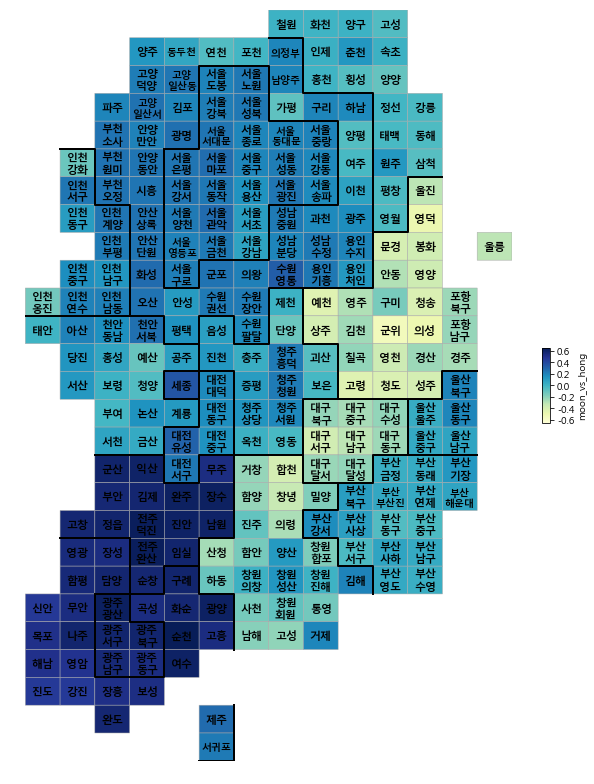

In [164]:
drawKorea('moon_vs_hong', final_elect_data, 'YlGnBu')

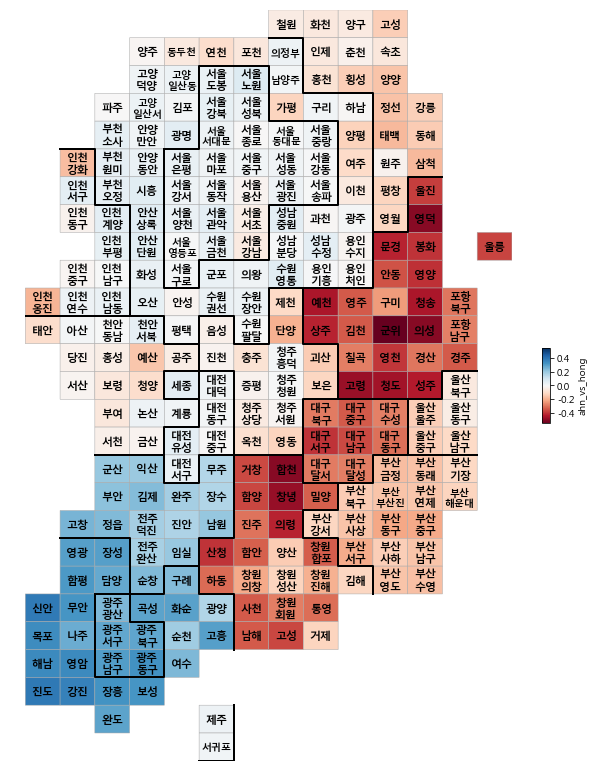

In [165]:
drawKorea('ahn_vs_hong', final_elect_data, 'RdBu')

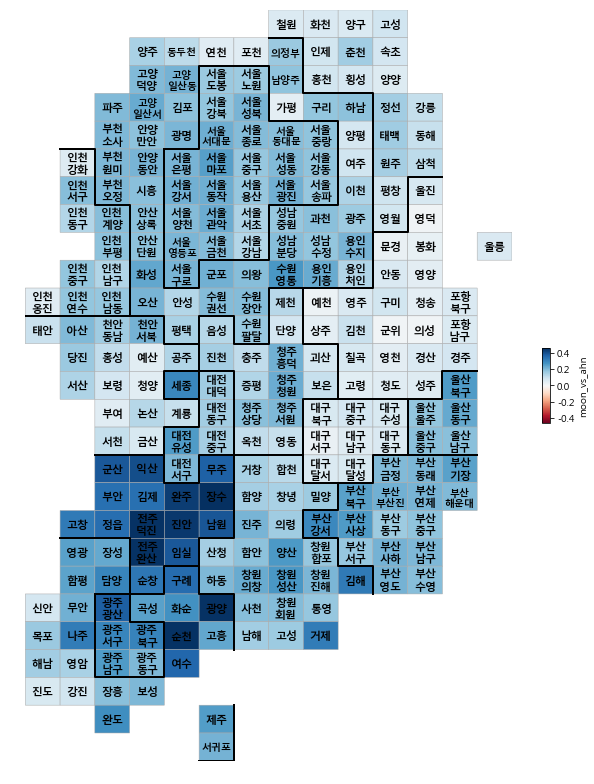

In [166]:
drawKorea('moon_vs_ahn', final_elect_data, 'RdBu')

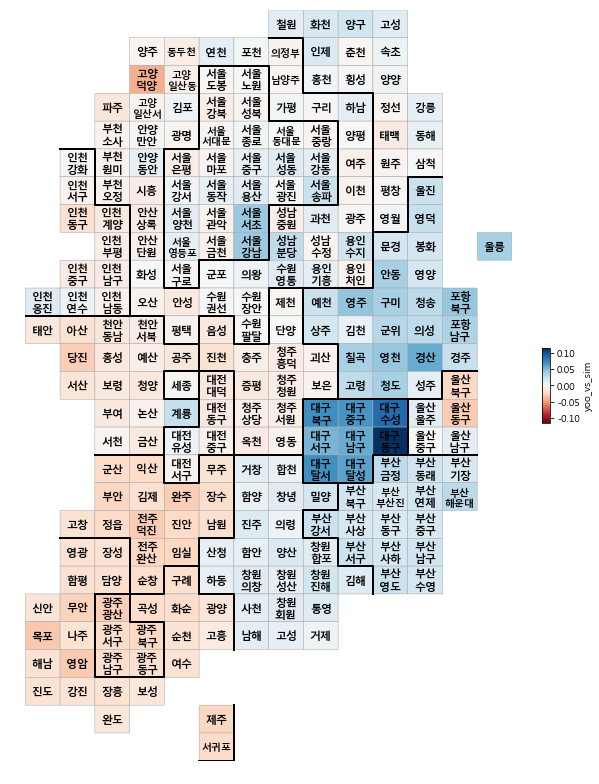

In [167]:
drawKorea('yoo_vs_sim', final_elect_data, 'RdBu')

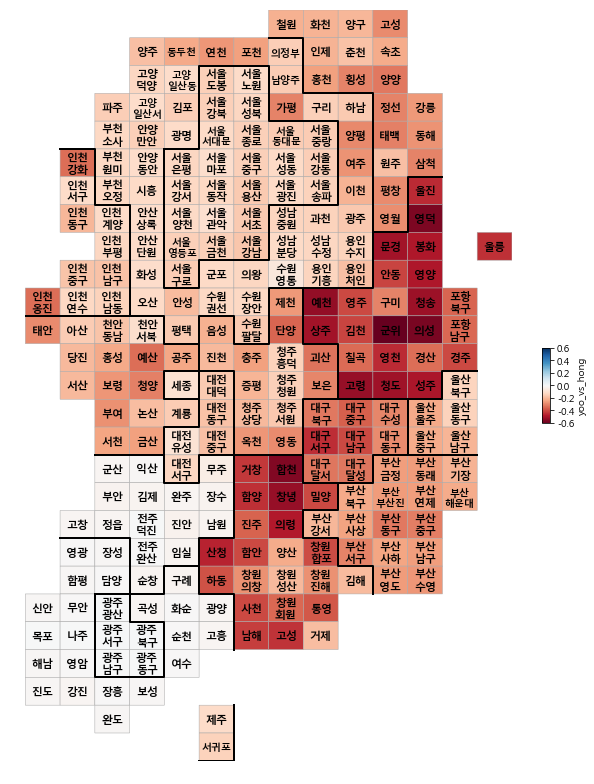

In [169]:
drawKorea('yoo_vs_hong', final_elect_data, 'RdBu')

In [170]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [173]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군구']

pop_folium.head()

,all,pop,moon,hong,ahn,yoo,sim,rate_moon,rate_hong,rate_ahn,...,rate_sim,poll_rate,Unnamed: 0,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong,yoo_vs_hong,yoo_vs_sim
ID,,,,,,,,,,,,,,,,,,,,,
서울 종로,133769.0,102566.0,42512.0,22325.0,22313.0,7412,7113,0.414484,0.217665,0.217548,...,0.069350,0.766740,34,4,6,0.196820,0.196937,-0.000117,-0.145399,0.002915
서울 중구,109836.0,82852.0,34062.0,17901.0,19372.0,5874,4993,0.411119,0.216060,0.233815,...,0.060264,0.754325,45,5,6,0.195059,0.177304,0.017755,-0.145162,0.010633
서울 용산,197962.0,148157.0,58081.0,35230.0,32109.0,11825,9773,0.392023,0.237788,0.216723,...,0.065964,0.748411,56,6,6,0.154235,0.175301,-0.021065,-0.157974,0.013850
서울 성동,259009.0,203175.0,86686.0,40566.0,45674.0,15859,12936,0.426657,0.199660,0.224801,...,0.063669,0.784432,46,5,7,0.226996,0.201856,0.025141,-0.121605,0.014387
서울 광진,305172.0,240030.0,105512.0,46368.0,52824.0,17114,16540,0.439578,0.193176,0.220072,...,0.068908,0.786540,57,6,7,0.246403,0.219506,0.026897,-0.121876,0.002391


In [174]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['moon_vs_hong'],
               columns = [pop_folium.index, pop_folium['moon_vs_hong']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map